# Avance 1
## Iris Dataset
### Equipo 4
#### Gustavo Adolfo Echartea Alvarado
#### Belen N ohemi Cruz Eufracio
#### Alejandra Lopez Fernandez



## Preguntas de Interes
### ¿La medida de los componentes de la flor influyen en la especie de la misma?
### ¿Es eficiente clasificar flores por sus medidas?

## Contexto
##### El conjunto de datos de flores Iris es un conjunto de datos multivariado introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936 El uso de mediciones múltiples en problemas taxonómicos. A veces se le llama el conjunto de datos Iris de Anderson porque Edgar Anderson recopiló los datos para cuantificar la variación morfológica de las flores Iris de tres especies relacionadas. El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris (Iris Setosa, Iris virginica e Iris versicolor). Se midieron cuatro características de cada muestra: la longitud y el ancho de los sépalos y pétalos, en centímetros.

#### Este conjunto de datos se convirtió en un caso de prueba típico para muchas técnicas de clasificación estadística en el aprendizaje automático, como las máquinas de vectores de soporte

## Contenido
#### El conjunto de datos contiene un conjunto de 150 registros bajo 5 atributos: longitud de pétalo, ancho de pétalo, longitud de sepal, ancho de sepal y clase (especie)

In [17]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn

In [18]:
iris = pd.read_csv("iris.csv")


Importamos librerias para hacer uso de nuestra BDD y la BDD

In [19]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Nuestra BDD almacena informacion de las distintan variantes de la flor iris en este caso trabaja con 3 distintas subespecie las cuales son: Setoso, Virginica y Versicolor, haciendo una comparacion del largo y ancho del tallo y de los petalos y como varia entre cada flor.

In [7]:
iris.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [20]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [21]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Al momento no detectamos que fuese necesario hacer un cambio de nombre de columnas o eliminar columnas ya que todas son necesarias para el analisis de nuestros datos y al detectar que tampoco tenemos registros con valores nulos, evitamos eliminarlos ya que podremos hacer uso de todos.


In [22]:
clase_1 = iris[iris['species']=='setosa']

In [23]:
clase_2 = iris[iris['species']=='virginica']

In [24]:
clase_3 = iris[iris['species']=='versicolor']

En este apartado generamos 3 clases distintas 1 por cada subespecie de Iris, esto para al momento de empezara a trabajar con la estadistica hacer los calculos por separado asi sea un poco mas rapido y encontrar los puntos entre las medidas del tallo y petalo que mejor describen a la flor y poder clasificarlo de mejor manera

In [25]:
clase_1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
clase_2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [27]:
clase_3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


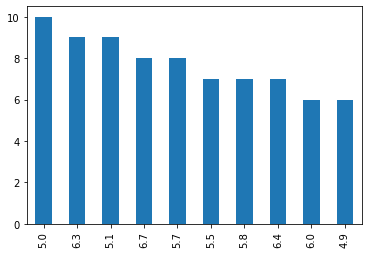

In [31]:
iris['sepal_length'].value_counts().head(10).plot.bar()


Grafica demostrativa donde mostramos la frecuencia en la que se repite la medidad del largo de los tallos de la flor

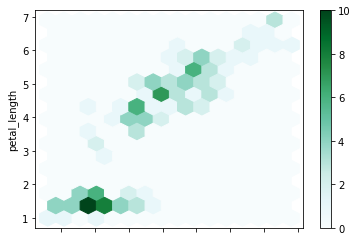

In [33]:
iris[iris['sepal_length'] < 100].plot.hexbin(x='sepal_length', y='petal_length', gridsize=15)

Grafica demostrativa donde mostramos la relacion entre el largo de los petalos con el largo de los tallos 